<a href="https://colab.research.google.com/github/eitanfass/Tomato_quality/blob/main/GRVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

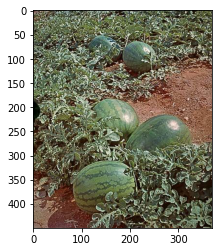

<ipython-input-5-2d741bdd0975>:11: RuntimeWarning: invalid value encountered in true_divide
  grvi=(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])


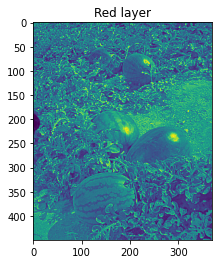

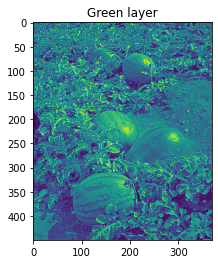

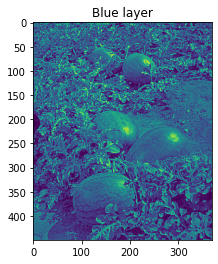

In [5]:
import skimage.io as io # io is an input output moduile, as part of skimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from skimage.util import img_as_float
image = img_as_float(img)
img=io.imread(fname ='/content/drive/MyDrive/saved_imgs/watermelon plant/1.watermelon.jpg')
img = img_as_float(img)
plt.imshow(img)
plt.show()
grvi=(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])

# grvi=(grvi*255).astype('uint8')
# grvi = io.img_as_float(grvi)
for i,layer in zip(range(0,3),['Red layer','Green layer','Blue layer']):
  plt.imshow(img[:,:,i])
  plt.title(layer)
  plt.show()

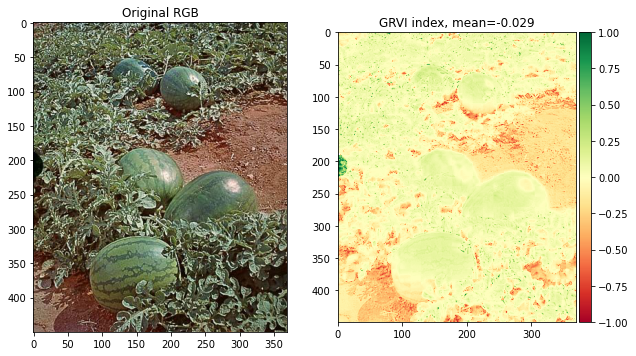

In [6]:
# define figure size: width 10 and height 15
plt.figure(figsize=(10, 15))

# subplot for the RGB
ax1 = plt.subplot(121, title='Original RGB')
im1 = ax1.imshow(img) 

# subplot for the index
ax2 = plt.subplot(122, title=f'GRVI index, mean={np.nanmean(grvi):.3f}') # notice the position, and the title
im2 = ax2.imshow(grvi,cmap='RdYlGn') 


# add colorbar only to the image on the right
divider = make_axes_locatable(ax2)
colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)  
plt.colorbar(im2, cax=colorbar_ax)
